First, We import the Libraries and the Machine Learning Models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

We read the csv Dataset

In [3]:
df = pd.read_csv("/content/bitcoin.csv")

Now, we use Head in DataFrame to give the First 4 Data Values in the Dataset

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Now, we Use Shape for Diplaying the Number of Rows and Columns

In [5]:
df.shape

(2713, 7)

Now, We Use Describe for Describing the Values of the Data in DataFrame

In [6]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


We Use info to Display the DataType of the Frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


We use Matplot to display the Bitcoin Close Price of the Data in Lineplot

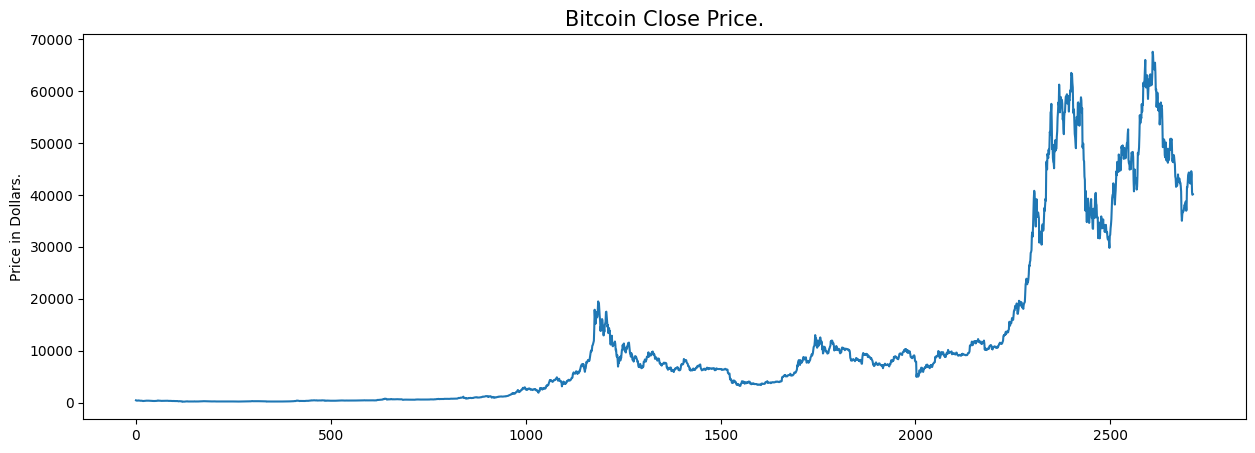

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price.',fontsize=15)
plt.ylabel('Price in Dollars.')
plt.show()

Using this Function,We find the Close Price and the Adjacent Close Price of the DataSet and We have Used Shape Function to Display the Row and Column of the Dataset

In [9]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In this Program, We Remove the Adjacent Close Price From the Dataset

In [10]:
df = df.drop(['Adj Close'],axis = 1)

Now,We check the Null Values in the Dataset for Checking the Total Number of Null Values found in the Dataset Using the Sum Function

In [11]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


Using the Features such as Open,High,Low,Close We use Subplot and Distplot Graph to Indicate the Density of the Dataset:

<ipython-input-12-4beb7ab9e439>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-12-4beb7ab9e439>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-12-4beb7ab9e439>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

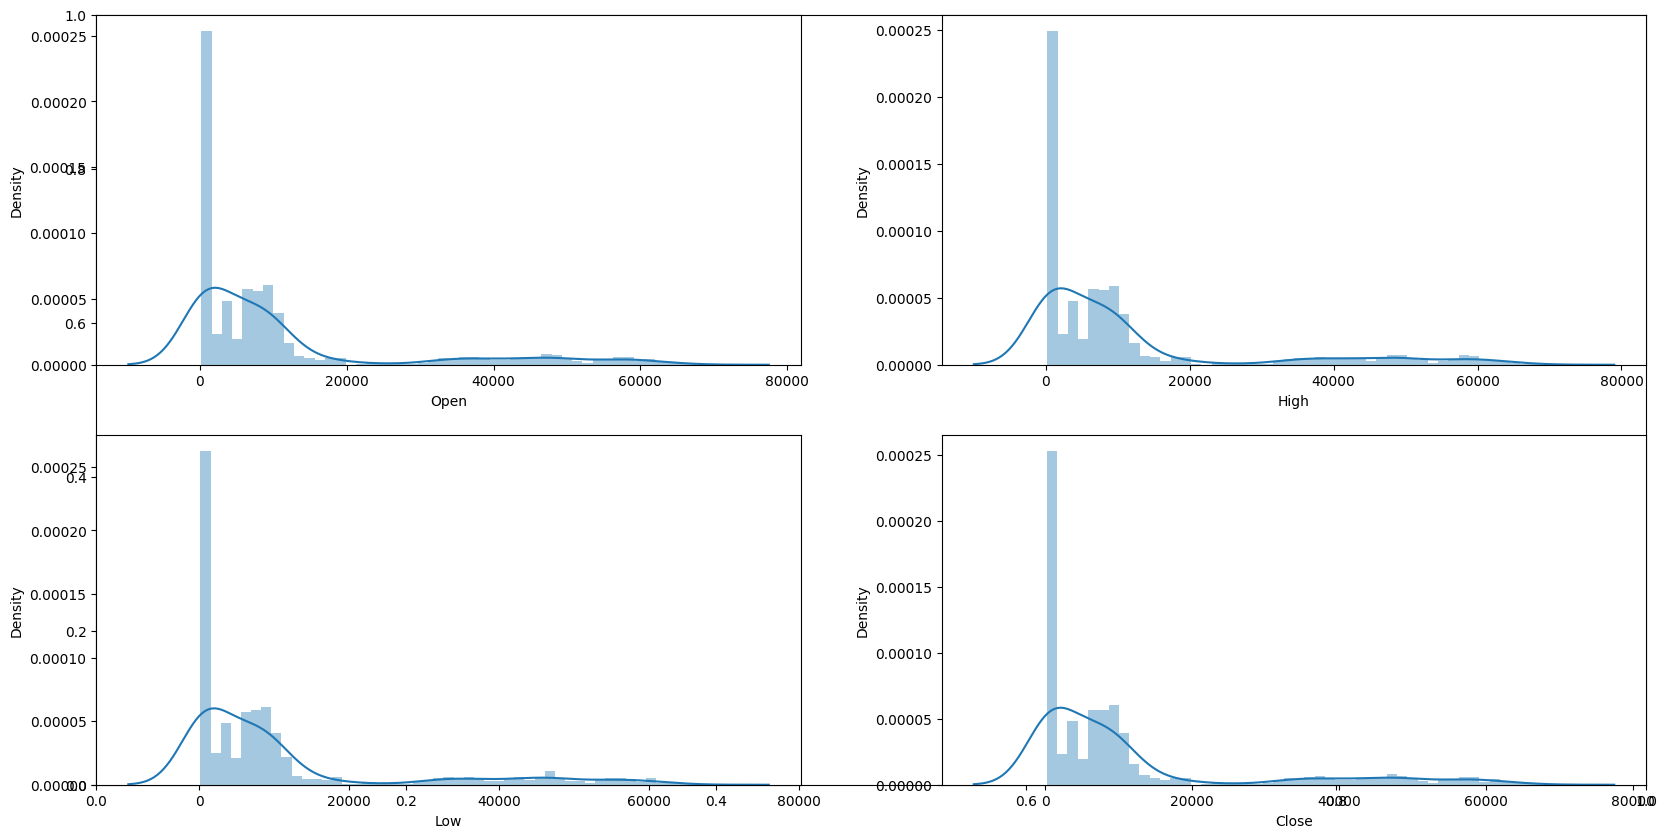

In [12]:
features = ['Open','High','Low','Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

Now, We Use the Subplot and Boxplot for Identifying the Data Values in the DataSet Features in the Boxplot

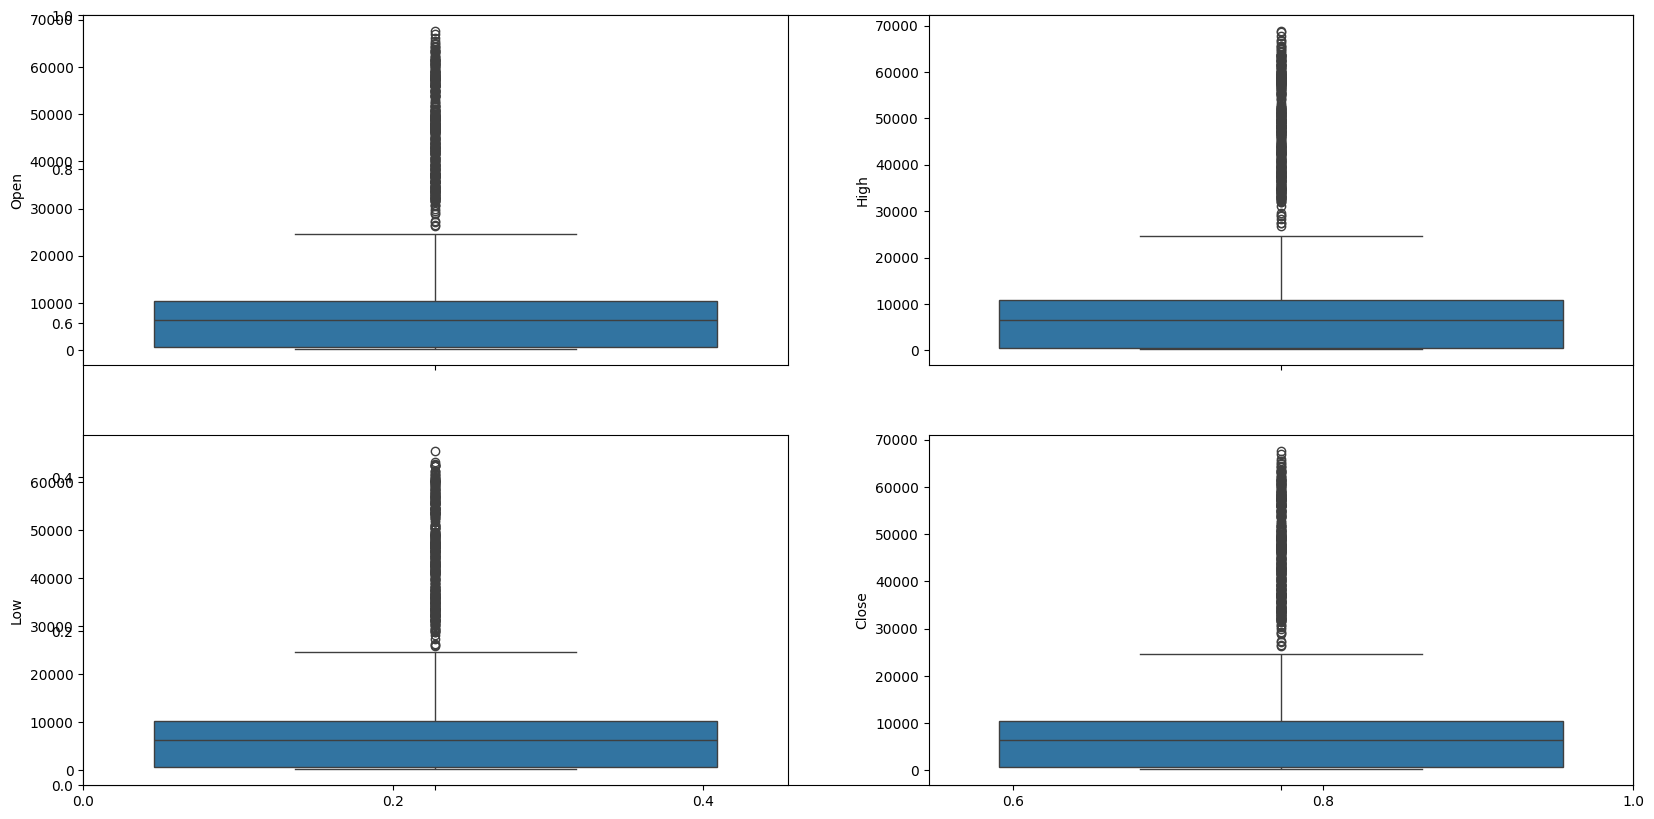

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

Now, We Split the Data into 3 Parts as Year,Month and Day and also 3 rows are also added in the DataSet

In [14]:
splitted= df['Date'].str.split('-', expand = True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


Here, We Used Figure And Axes as it is used for Matplot. In this Program, We use Subplots and we use Tight_Layout to prevent Overlapping

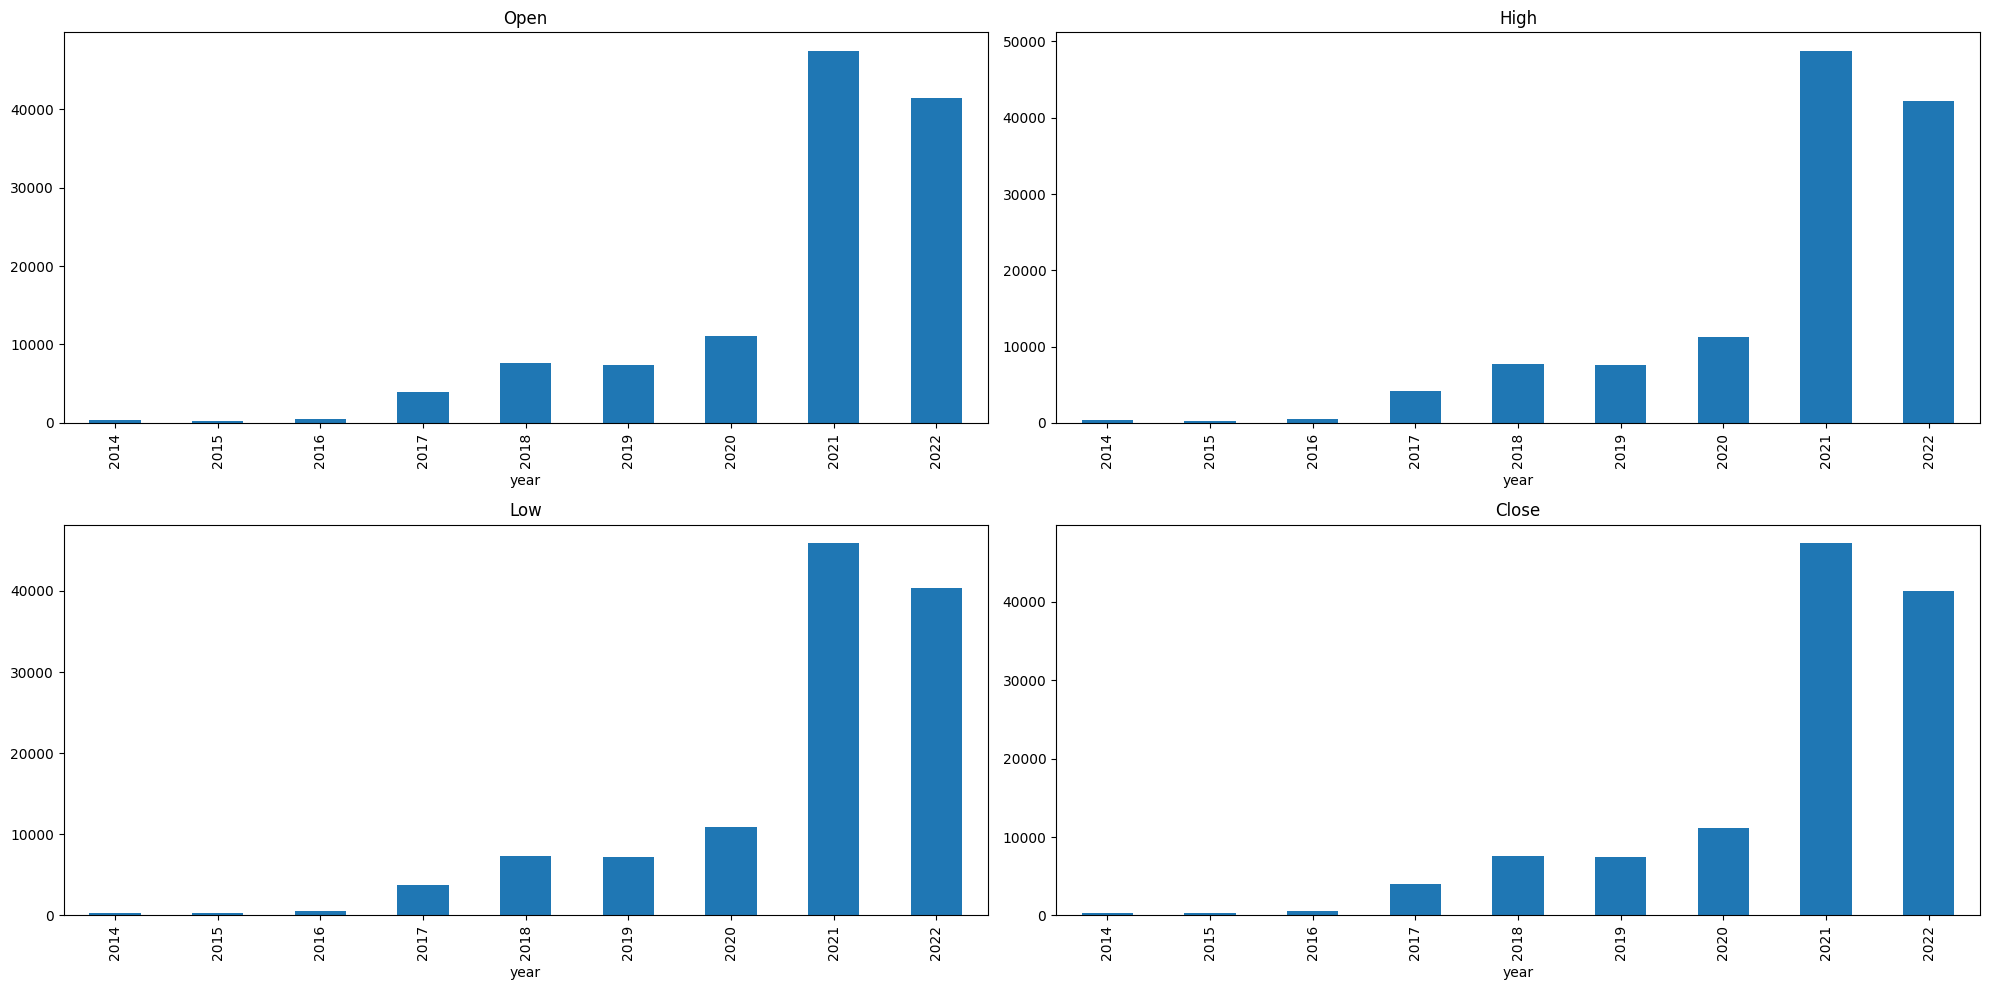

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    data_grouped[col].plot.bar(ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout()
plt.show()

In this Program Quarter End Column is Created to Display the Quarter End Dates in the DataSet and it is calculated by using %3 Modulus to Divide the Last Day By 3

In [16]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In this Program,'Open' and 'Close' is applied and they are the Existing Columns in the DataFrame and they are subtracted, the 'target' column is created as a binary indicator: 1 if the 'Close' price increased the next day, and 0 if it did not increase.

In [17]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target']= np.where(df['Close'].shift(-1) > df['Close'],1,0)

In this Program, We Show the Pie Chart of the Program.This code takes the 'target' column from a DataFrame, calculates the frequency of 0s and 1s in that column, and then uses that information to create a pie chart visualizing the distribution of these values as percentages

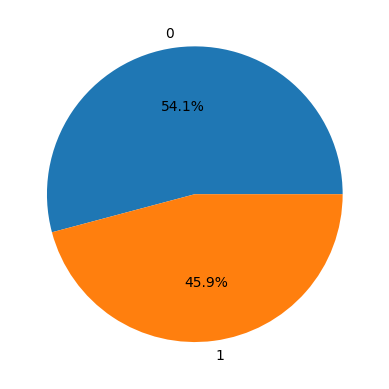

In [18]:
plt.pie(df['target'].value_counts().values,labels=[0,1], autopct='%1.1f%%')
plt.show()

 this code snippet creates a heatmap to visualize the strong positive correlations (greater than 0.9) between the features in the DataFrame df. The heatmap cells are annotated with the correlation values, and the colorbar is omitted for a cleaner look.

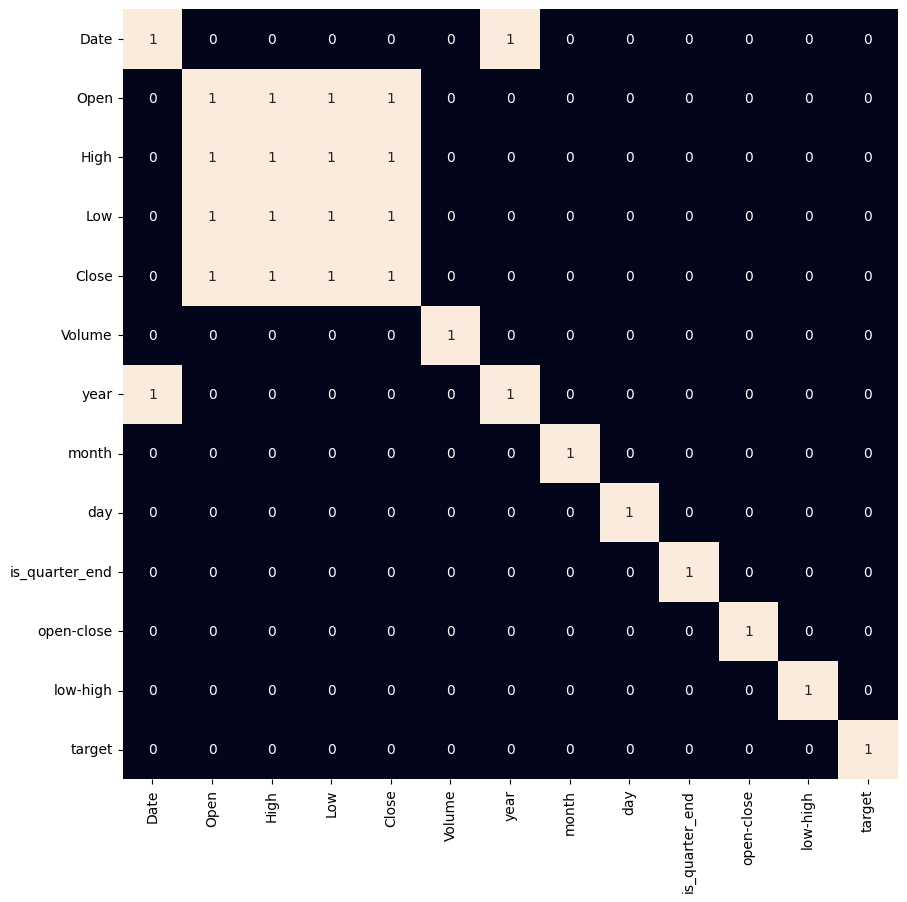

In [19]:
plt.figure(figsize = (10,10))
sb.heatmap(df.corr() > 0.9,annot = True, cbar=False)
plt.show()

This code snippet prepares the data for machine learning by:

Selecting relevant features and the target variable
,Scaling the features to improve model performance and
Splitting the data into training and validation sets to evaluate the model's ability to generalize to unseen data.

In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scalar = StandardScaler()
features = scalar.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size = 0.1, random_state = 2022)
print(X_train.shape, X_valid.shape)

(2441, 3) (272, 3)


 This code snippet trains three different machine learning models on the Bitcoin price data and then evaluates their performance on both the training data and a separate validation set to see how well they are likely to predict future price movements.

In [21]:
models = [LogisticRegression(), SVC(kernel = 'poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} :')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy :', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() :
Training Accuracy :  0.5272712493564907
Validation Accuracy : 0.5187429004165088

SVC(kernel='poly', probability=True) :
Training Accuracy :  0.4828751998265911
Validation Accuracy : 0.5278844593498134

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :
Training Accur

This code takes the trained Logistic Regression model (models[0]), applies it to the validation data (X_valid, Y_valid), and generates a confusion matrix to visualize how well the model is classifying the data. The confusion matrix is then displayed as a plot for easy interpretation.

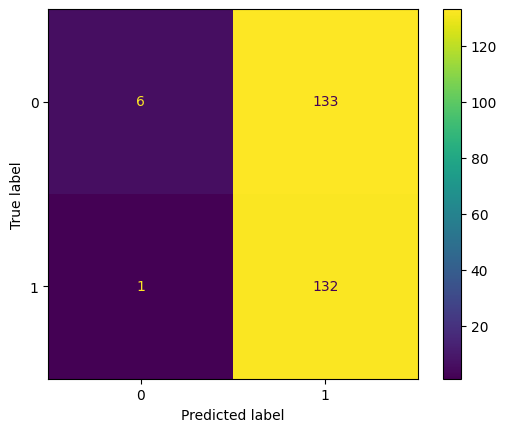

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid ,Y_valid)
plt.show()